In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from collections import Counter
import os
print(os.listdir("../input"))

FileNotFoundError: [WinError 3] Системе не удается найти указанный путь: '../input'

In [ ]:
#reading tmdb csv file and storing that to a variable
data = pd.read_csv('movie_bd_v5.xls')

#calling out first 5 rows (excluding headers) of tmdb database
# tmdb.head()

In [3]:
movie_bd = (tmdb[(tmdb['revenue'] > 2000000) & (tmdb['budget'] >= 5000000) & (tmdb['release_year'] > 1999)])
len(movie_bd)

2097

In [4]:
movie_bd['profit'] = tmdb['revenue'] - tmdb['budget']
movie_bd = (movie_bd[(movie_bd['profit'] >= 2000000) | (movie_bd['profit'] <= -2000000)])
len(movie_bd)

/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


2008

In [5]:
movie_bd = movie_bd[['imdb_id', 'budget', 'revenue', 'original_title',
       'cast', 'director', 'tagline', 'overview',
       'runtime', 'genres', 'production_companies', 'release_date', 'vote_average', 'release_year',]]

In [6]:
movie_bd = movie_bd.dropna()
print(len(movie_bd))
print(movie_bd.isna().sum())

1890
imdb_id                 0
budget                  0
revenue                 0
original_title          0
cast                    0
director                0
tagline                 0
overview                0
runtime                 0
genres                  0
production_companies    0
release_date            0
vote_average            0
release_year            0
dtype: int64


In [7]:
movie_bd.duplicated().sum()

0

In [8]:
movie_bd = movie_bd[movie_bd['imdb_id'] != 'tt1032751']
len(movie_bd)

1889

In [9]:
movie_bd.to_csv('movie_bd_v5.csv',index=False)

In [4]:
movie_bd = pd.read_csv('movie_bd_v5.xls')
movie_bd.sample(5)

,imdb_id,budget,revenue,original_title,cast,director,tagline,overview,runtime,genres,production_companies,release_date,vote_average,release_year
1015,tt1276104,30000000,47042000,Looper,Joseph Gordon-Levitt|Bruce Willis|Emily Blunt|...,Rian Johnson,"Hunted By Your Future, Haunted By Your Past","In the futuristic action thriller Looper, time...",118,Action|Thriller|Science Fiction,Endgame Entertainment|FilmDistrict|DMG Enterta...,9/26/2012,6.5,2012
1794,tt0367959,50000000,82169884,Hannibal Rising,Gaspard Ulliel|Aaran Thomas|Gong Li|Dominic We...,Peter Webber,It started with revenge.,"The story of the early, murderous roots of the...",121,Crime|Drama|Thriller,Ingenious Film Partners|ETIC Films|Quinta Comm...,2/6/2007,6.0,2007
1522,tt0454919,38000000,29907685,Pulse,Kristen Bell|Ian Somerhalder|Christina Milian|...,Jim Sonzero,You are now infected.,When their computer hacker friend accidentally...,90,Horror|Thriller,Dimension Films,8/11/2006,5.1,2006
1654,tt0241025,23000000,16123851,Vanity Fair,Reese Witherspoon|James Purefoy|Jonathan Rhys ...,Mira Nair,"On September 1st, a heroine will rise.","Beautiful, funny, passionate, and calculating,...",141,Drama|Romance,Alliance Films|Focus Features,9/1/2004,5.5,2004
720,tt0458339,140000000,370569774,Captain America: The First Avenger,Chris Evans|Hugo Weaving|Tommy Lee Jones|Hayle...,Joe Johnston,When patriots become heroes,"Predominantly set during World War II, Steve R...",124,Action|Adventure|Science Fiction,Marvel Studios,7/22/2011,6.5,2011


In [11]:
movie_bd.describe()

,budget,revenue,runtime,vote_average,release_year
count,1.889000e+03,1.889000e+03,1889.000000,1889.000000,1889.000000
mean,5.431083e+07,1.553653e+08,109.658549,6.140762,2007.860773
std,4.858721e+07,2.146698e+08,18.017041,0.764763,4.468841
min,5.000000e+06,2.033165e+06,63.000000,3.300000,2000.000000
25%,2.000000e+07,3.456058e+07,97.000000,5.600000,2004.000000
50%,3.800000e+07,8.361541e+07,107.000000,6.100000,2008.000000
75%,7.200000e+07,1.782626e+08,120.000000,6.600000,2012.000000
max,3.800000e+08,2.781506e+09,214.000000,8.100000,2015.000000


In [12]:
len(movie_bd)

1889

# Предобработка

In [13]:
answers = {}

#making a new column
movie_bd['profit'] = movie_bd['revenue'] - movie_bd['budget']
#movie_bd['cof_profit'] = movie_bd['revenue']/movie_bd['budget']

#the the given in the dataset is in string format.
#So we need to change this in datetime format



#movie_bd['release_date'].head()

movie_bd['season'] = movie_bd['release_date'].apply(lambda dt: (dt.month%12 + 3)//3) # лето, весна, осень, зима

In [14]:
data = movie_bd

# 1. У какого фильма из списка самый большой бюджет?
Варианты ответов:
1. The Dark Knight Rises (tt1345836)
2. Spider-Man 3 (tt0413300)
3. Avengers: Age of Ultron (tt2395427)
4. **The Warrior's Way	(tt1032751)**
5. Pirates of the Caribbean: On Stranger Tides (tt1298650)

In [15]:
answers['1'] = '5. Pirates of the Caribbean: On Stranger Tides (tt1298650)'

In [45]:
print(data.original_title[data.budget.idxmax()])

Pirates of the Caribbean: On Stranger Tides


In [21]:
%%timeit
data[data['budget'] == data['budget'].max()]['original_title'].values[0]

937 µs ± 10.5 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)


In [20]:
%%timeit 
data.loc[data['budget'] == data['budget'].max(),'original_title'].values[0]

490 µs ± 2.72 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)


In [43]:
%%timeit 
data.original_title[data.budget.idxmax()]

96.6 µs ± 412 ns per loop (mean ± std. dev. of 7 runs, 10000 loops each)


In [22]:
%%timeit
data.sort_values(['budget'], ascending=False).head(1)['original_title']

1.39 ms ± 11.7 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)


ВАРИАНТ 2

In [18]:
# Top 10
data[['budget', 'original_title', 'imdb_id']].sort_values('budget', ascending=False)[:10]

,budget,original_title,imdb_id
723,380000000,Pirates of the Caribbean: On Stranger Tides,tt1298650
1669,300000000,Pirates of the Caribbean: At World's End,tt0449088
14,280000000,Avengers: Age of Ultron,tt2395427
1014,260000000,John Carter,tt0401729
380,260000000,Tangled,tt0398286
1676,258000000,Spider-Man 3,tt0413300
1245,255000000,The Lone Ranger,tt1210819
374,250000000,Harry Potter and the Deathly Hallows: Part 1,tt0926084
1186,250000000,The Hobbit: The Desolation of Smaug,tt1170358
972,250000000,The Dark Knight Rises,tt1345836


# 2. Какой из фильмов самый длительный (в минутах)?
1. The Lord of the Rings: The Return of the King	(tt0167260)
2. **Gods and Generals	(tt0279111)**
3. King Kong	(tt0360717)
4. Pearl Harbor	(tt0213149)
5. Alexander	(tt0346491)

In [23]:
answers['2'] = '2. Gods and Generals (tt0279111)'

In [24]:
data.loc[data.runtime==data.runtime.max(),'original_title'].values[0]

'Gods and Generals'

In [26]:
data.original_title[data.runtime.idxmax()]

'Gods and Generals'

In [25]:
# Top 10
data[['runtime', 'original_title', 'imdb_id']].sort_values('runtime', ascending=False)[:10]

,runtime,original_title,imdb_id
1157,214,Gods and Generals,tt0279111
1081,201,The Lord of the Rings: The Return of the King,tt0167260
1736,191,Grindhouse,tt0462322
1336,187,King Kong,tt0360717
504,183,Pearl Harbor,tt0213149
1183,180,The Wolf of Wall Street,tt0993846
863,179,The Lord of the Rings: The Two Towers,tt0167261
496,178,The Lord of the Rings: The Fellowship of the Ring,tt0120737
1601,175,Alexander,tt0346491
993,172,Cloud Atlas,tt1371111


# 3. Какой из фильмов самый короткий (в минутах)?
Варианты ответов:

1. Home on the Range	tt0299172
2. The Jungle Book 2	tt0283426
3. **Winnie the Pooh	tt1449283**
4. Corpse Bride	tt0121164
5. Hoodwinked!	tt0443536





In [27]:
answers['3'] = '3. Winnie the Pooh tt1449283'

In [28]:
data.loc[data.runtime==data.runtime.min(),'original_title'].values[0]

'Winnie the Pooh'

In [29]:
print(data.original_title[data.runtime.idxmin()])

Winnie the Pooh


In [30]:
# Top 10
data[['runtime', 'original_title', 'imdb_id']].sort_values('runtime', ascending=False)[-10:]

,runtime,original_title,imdb_id
1587,80,Garfield,tt0356634
252,79,9,tt0472033
884,78,Stuart Little 2,tt0243585
1807,78,The Emperor's New Groove,tt0120917
1348,77,Corpse Bride,tt0121164
1408,76,Valiant,tt0361089
1626,76,Home on the Range,tt0299172
1097,72,The Jungle Book 2,tt0283426
930,72,Return to Never Land,tt0280030
768,63,Winnie the Pooh,tt1449283


# 4. Какова средняя длительность фильмов?

Варианты ответов:
1. 115
2. 110
3. 105
4. 120
5. 100


In [31]:
answers['4'] = '2. 110'

In [39]:
data['runtime'].mean()

109.6585494970884

In [40]:
data.runtime.mean()

109.6585494970884

# 5. Каково медианное значение длительности фильмов? 

Варианты ответов:
1. 107
2. 112
3. 101
4. 120
5. 115




In [46]:
answers['5'] = '1. 107'

In [47]:
data.runtime.median()

107.0

# 6. Какой самый прибыльный фильм?
### Внимание! Здесь и далее под «прибылью» или «убытками» понимается разность между сборами и бюджетом фильма. (прибыль = сборы - бюджет) в нашем датасете это будет (profit = revenue - budget) 

Варианты ответов:
1. The Avengers	tt0848228
2. Minions	tt2293640
3. Star Wars: The Force Awakens	tt2488496
4. Furious 7	tt2820852
5. **Avatar	tt0499549**

In [48]:
answers['6'] = '5. Avatar tt0499549'

In [49]:
data.loc[data.profit==data.profit.max(),'original_title'].values[0]

'Avatar'

In [51]:
print(data.original_title[data.profit.idxmax()])

Avatar


In [50]:
data[['profit', 'original_title', 'imdb_id']].sort_values('profit', ascending=False)[:10]

,profit,original_title,imdb_id
239,2544505847,Avatar,tt0499549
3,1868178225,Star Wars: The Force Awakens,tt2488496
0,1363528810,Jurassic World,tt0369610
4,1316249360,Furious 7,tt2820852
970,1299557910,The Avengers,tt0848228
722,1202817822,Harry Potter and the Deathly Hallows: Part 2,tt1201607
14,1125035767,Avengers: Age of Ultron,tt2395427
1177,1124219009,Frozen,tt2294629
8,1082730962,Minions,tt2293640
1081,1024888979,The Lord of the Rings: The Return of the King,tt0167260


# 7. Какой фильм самый убыточный? 

Варианты ответов:
1. Supernova tt0134983
2. Frozen	tt2294629
3. Speed Racer	tt0811080
4. The Adventures of Pluto Nash	tt0180052
5. Miles to Gracelan	tt0233142

In [52]:
answers['7'] = '4. The Adventures of Pluto Nash (tt0180052)'

In [55]:
data.sort_values(by='profit').head(10)['original_title']

1245                 The Lone Ranger
1616                       The Alamo
809                  Mars Needs Moms
958     The Adventures of Pluto Nash
1464                    Flushed Away
636                        Australia
1872                       Supernova
1400              A Sound of Thunder
1718                           Awake
468                  How Do You Know
Name: original_title, dtype: object

In [54]:
# Top 10
data[['profit', 'original_title', 'imdb_id']].sort_values('profit', ascending=False)[-10:]

,profit,original_title,imdb_id
468,-71331093,How Do You Know,tt1341188
1718,-71626175,Awake,tt0211933
1400,-74010360,A Sound of Thunder,tt0318081
1872,-75171919,Supernova,tt0134983
636,-80445998,Australia,tt0455824
1464,-84540684,Flushed Away,tt0424095
958,-92896027,The Adventures of Pluto Nash,tt0180052
809,-111007242,Mars Needs Moms,tt1305591
1616,-119180039,The Alamo,tt0318974
1245,-165710090,The Lone Ranger,tt1210819


# 8. У скольких фильмов из датасета объем сборов оказался выше бюджета?
Варианты ответов:
1. **1478**
2. 1520
3. 1241
4. 1135
5. 1398


In [56]:
answers['8'] = '1. 1478'

In [57]:
%%time
len(data[data['profit'] > 0])

CPU times: user 3.7 ms, sys: 2.13 ms, total: 5.83 ms
Wall time: 3.99 ms


1478

In [58]:
%%time
data.loc[(data.profit)>0].shape[0]

CPU times: user 3.81 ms, sys: 60 µs, total: 3.87 ms
Wall time: 2.82 ms


1478

# 9. Какой фильм оказался самым кассовым в 2008 году?
Варианты ответов:
1. Madagascar: Escape 2 Africa	tt0479952
2. Iron Man	tt0371746
3. Kung Fu Panda	tt0441773
4. **The Dark Knight	tt0468569**
5. Mamma Mia!	tt0795421

In [59]:
answers['9'] = '4. The Dark Knight (tt0468569)'

In [60]:
data.loc[data.release_year==2008].sort_values(by='revenue',ascending=False).head(1)['original_title'].values[0]

'The Dark Knight'

In [62]:
d = data.loc[data.release_year == 2008]
d.set_index('original_title')['profit'].idxmax()

'The Dark Knight'

In [61]:
# Top 10
data[['revenue', 'original_title', 'imdb_id']][data['release_year']==2008].sort_values('revenue', ascending=False)[:10]

,revenue,original_title,imdb_id
599,1001921825,The Dark Knight,tt0468569
603,786636033,Indiana Jones and the Kingdom of the Crystal S...,tt0367882
606,631744560,Kung Fu Panda,tt0441773
621,624029371,Hancock,tt0448157
607,609841637,Mamma Mia!,tt0795421
612,603900354,Madagascar: Escape 2 Africa,tt0479952
605,586090727,Quantum of Solace,tt0830515
601,585174222,Iron Man,tt0371746
600,521311860,WALLÂ·E,tt0910970
624,419651413,The Chronicles of Narnia: Prince Caspian,tt0499448


# 10. Самый убыточный фильм за период с 2012 по 2014 г. (включительно)?
Варианты ответов:
1. Winter's Tale	tt1837709
2. Stolen	tt1656186
3. Broken City	tt1235522
4. Upside Down	tt1374992
5. **The Lone Ranger	tt1210819**


In [63]:
answers['10'] = '5. The Lone Ranger (tt1210819)'

In [1]:
data.loc[(data.release_year>=2012)&(data.release_year<=2014)].sort_values(by='profit')#.head(1)['original_title'].values[0]

NameError: name 'data' is not defined

In [66]:
data[data.profit == data.query('2012 <= release_year <= 2014').profit.min()]

,imdb_id,budget,revenue,original_title,cast,director,tagline,overview,runtime,genres,production_companies,release_date,vote_average,release_year,profit,season
1245,tt1210819,255000000,89289910,The Lone Ranger,Johnny Depp|Armie Hammer|William Fichtner|Hele...,Gore Verbinski,Never Take Off the Mask,The Texas Rangers chase down a gang of outlaws...,149,Action|Adventure|Western,Walt Disney Pictures|Jerry Bruckheimer Films|I...,2013-07-03,6.0,2013,-165710090,3


In [65]:
colums_ls=['profit', 'original_title', 'imdb_id','release_year']
movie_bd[colums_ls][(movie_bd['release_year']>=2012) & (movie_bd['release_year']<=2014)].sort_values('profit', ascending=False)[-10:]

,profit,original_title,imdb_id,release_year
187,-25592384,Sin City: A Dame to Kill For,tt0458481,2014
216,-29199769,Winter's Tale,tt1837709,2014
144,-32694825,The Interview,tt2788710,2014
1033,-32893443,Stolen,tt1656186,2012
1278,-36298836,Broken City,tt1235522,2013
1235,-45510171,Bullet to the Head,tt1308729,2013
1302,-51337973,Legends of Oz: Dorothy's Return,tt0884726,2013
1007,-51893525,Upside Down,tt1374992,2012
1214,-68351500,R.I.P.D.,tt0790736,2013
1245,-165710090,The Lone Ranger,tt1210819,2013


# 11. Какого жанра фильмов больше всего?
Варианты ответов:
1. Action
2. Adventure
3. **Drama**
4. Comedy
5. Thriller

In [68]:
answers['11'] = '3. Drama'

### ВАРИАНТ 1
через модуль collections с функцией Counter

In [76]:
Counter(data['genres'].str.cat(sep='|').split('|')).most_common(1)

[('Drama', 782)]

In [77]:
Counter(data.genres.str.split('|').sum()).most_common(1)

[('Drama', 782)]

### Вариант 2

In [71]:
pd.Series(data['genres'].str.cat(sep='|').split('|')).value_counts()[:5]

Drama        782
Comedy       683
Thriller     596
Action       582
Adventure    415
dtype: int64

по шагам

In [72]:
# превращаем все в одну строку
data['genres'].str.cat(sep='|')[:100]

'Action|Adventure|Science Fiction|Thriller|Action|Adventure|Science Fiction|Thriller|Adventure|Scienc'

In [73]:
# создаем список разделяя строку по '|'
pd.Series(data['genres'].str.cat(sep='|').split('|'))[:5]

0             Action
1          Adventure
2    Science Fiction
3           Thriller
4             Action
dtype: object

In [74]:
# считаем количество элементов в серии
pd.Series(data['genres'].str.cat(sep='|').split('|')).value_counts()[:5]

Drama        782
Comedy       683
Thriller     596
Action       582
Adventure    415
dtype: int64

Text(0, 0.5, 'Movies')

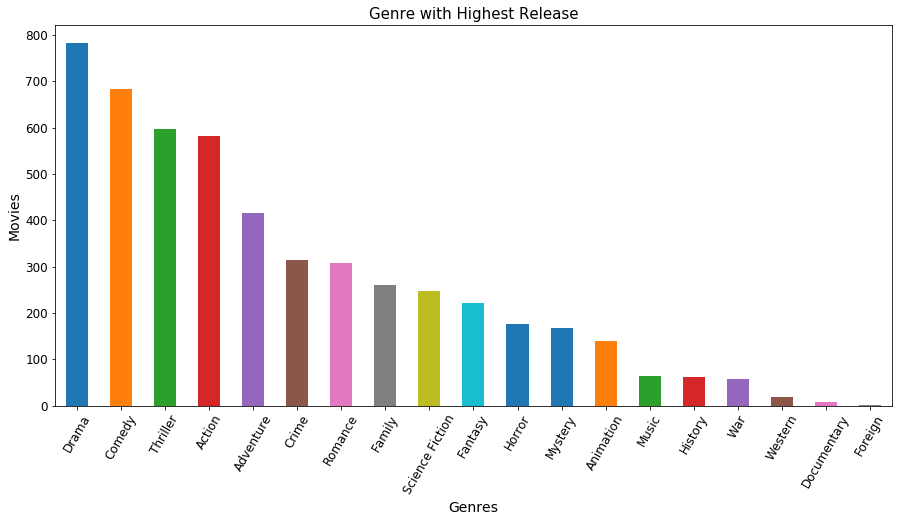

In [75]:
# завернем в функцию и будем использовать в дальнейшем
def counter(movie_bd, x):
    data_tmp=movie_bd[x].str.cat(sep='|') # превращаем все в одну строку
    data_tmp=pd.Series(data_tmp.split('|')) # создаем список разделяя строку по '|'
    data_tmp=data_tmp.value_counts(ascending=False) # считаем количество элементов строке
    return data_tmp 

count=counter(data,'genres')
count.plot(kind='bar',figsize=(15,7),fontsize=12)
plt.xticks(rotation=60)
plt.title("Genre with Highest Release",fontsize=15)
plt.xlabel("Genres",fontsize=14)
plt.ylabel("Movies",fontsize=14)

# 12. Фильмы какого жанра чаще всего становятся прибыльными? 

Варианты ответов:
1. **Drama**
2. Comedy
3. Action
4. Thriller
5. Adventure

In [80]:
answers['12'] = '1. Drama'

In [81]:
data_tmp = data[data['profit'] > 0]

In [82]:
print(pd.Series((data_tmp.genres.str.split('|').sum())).value_counts().index[0])

Drama


ВАРИАНТ 2

In [83]:
data_tmp = data[data['profit'] > 0]

Text(0, 0.5, 'Movies')

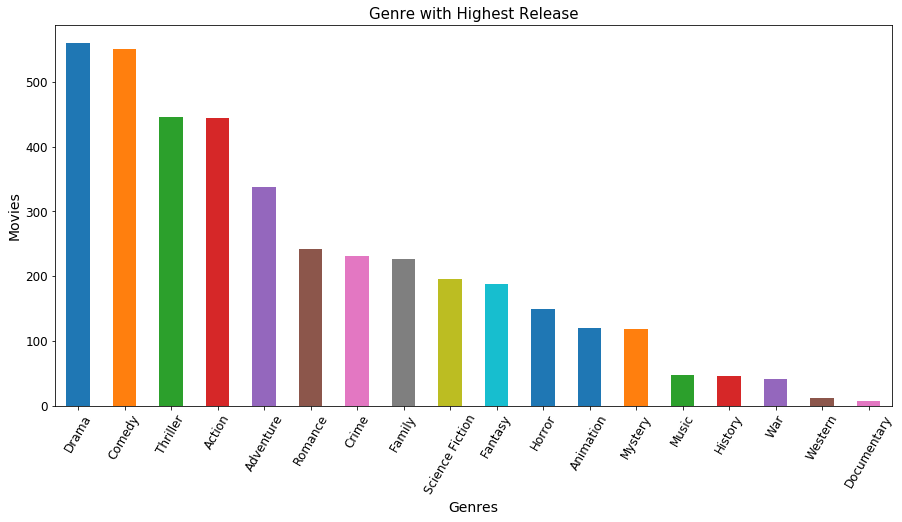

In [84]:
data_tmp=counter(data_tmp,'genres')
data_tmp.plot(kind='bar',figsize=(15,7),fontsize=12)
plt.xticks(rotation=60)
plt.title("Genre with Highest Release",fontsize=15)
plt.xlabel("Genres",fontsize=14)
plt.ylabel("Movies",fontsize=14)

# 13. У какого режиссера самые большие суммарные кассовые сбооры?
Варианты ответов:
1. Steven Spielberg
2. Christopher Nolan
3. David Yates
4. James Cameron
5. **Peter Jackson**


In [85]:
answers['13'] = '5. Peter Jackson'

In [86]:
# немного схитрим, и воспользуемся уже готовой функцией
directors=counter(data,'director')
directors['Ridley Scott']

12

In [90]:
# наша функция counter возвращает нам словарь, а как мы помним индексы у словаря уникальны что позволит нам 
# 1. сразу получить список режисеров без дублей (directors.index)
# 2. заполнить значение словаря нужными нам показателем
for director in directors.index:
    directors[director] = data['revenue'][data['director'].map(lambda x: True if director in x else False)].sum()

# отсортируем
directors = pd.DataFrame(directors).sort_values(0, ascending=False)
directors[:10]

,0
Peter Jackson,6490593685
Christopher Nolan,4167548502
David Yates,4154295625
Michael Bay,3886938960
J.J. Abrams,3579169916
Gore Verbinski,3426362290
Steven Spielberg,3386700791
McG,3323121992
Ridley Scott,3264035909
Francis Lawrence,3179979588


Text(0, 0.5, '$')

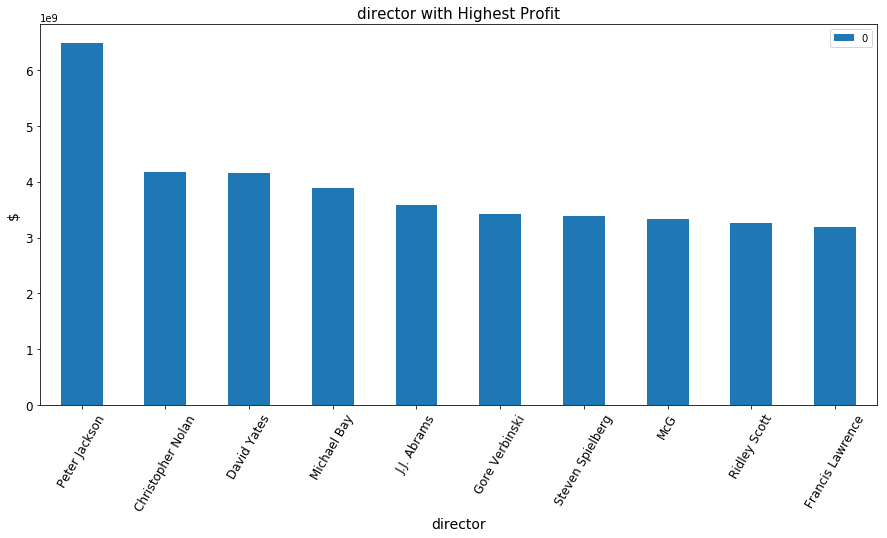

In [91]:
directors[:10].plot(kind='bar',figsize=(15,7),fontsize=12)
plt.xticks(rotation=60)
plt.title("director with Highest Profit",fontsize=15)
plt.xlabel("director",fontsize=14)
plt.ylabel("$",fontsize=14)

ВАРИАНТ 2

In [94]:
directors = set(data.director.str.split('|').sum())
pd.Series({x: data[data.director.str.contains(x)].revenue.sum() for x in directors}).\
                    sort_values(ascending = False).head(5)

Peter Jackson        6490593685
Christopher Nolan    4167548502
David Yates          4154295625
Michael Bay          3886938960
J.J. Abrams          3579169916
dtype: int64

# 14. Какой режисер снял больше всего фильмов в стиле Action?
Варианты ответа:
1. Ridley Scott
2. Guy Ritchie
3. Robert Rodriguez
4. Quentin Tarantino
5. Tony Scott

In [95]:
answers['14'] = '3. Robert Rodriguez'

In [96]:
data_tmp = data[data.genres.str.contains("Action")]

Robert Rodriguez      9
Paul W.S. Anderson    7
Michael Bay           7
Antoine Fuqua         6
Ridley Scott          6
dtype: int64

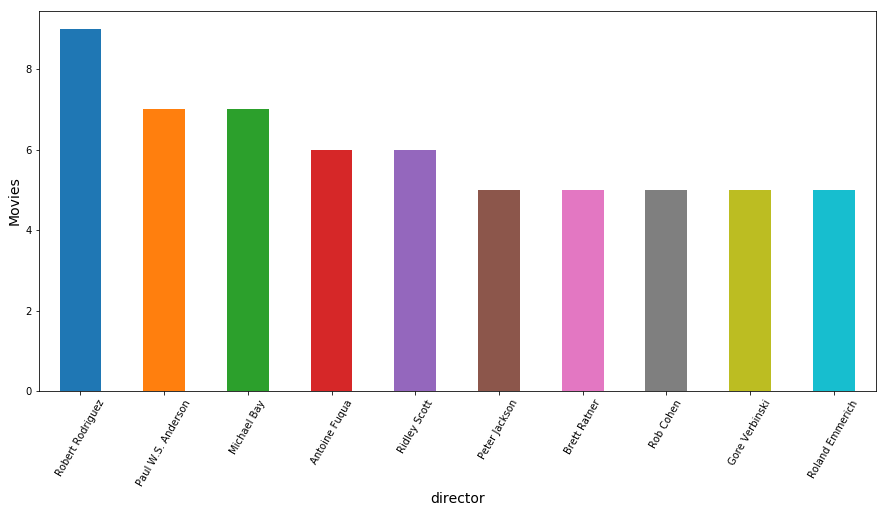

In [97]:
sum_gen=counter(data_tmp,'director')
sum_gen[:10].plot(kind='bar',figsize=(15,7),fontsize=10)
plt.xticks(rotation=60)
plt.xlabel("director",fontsize=14)
plt.ylabel("Movies",fontsize=14)
sum_gen[:5]

# 15. У какого актера самые высокие суммарные кассовые сборы в 2012 году? (суммарные сборы по фильмам с его участием)
Варианты ответов:
1. Nicolas Cage
2. Tom Hardy
3. Chris Hemsworth
4. Jim Sturgess
5. Emma Stone

In [98]:
answers['15'] = '3. Chris Hemsworth'

,0
Chris Hemsworth,2027450773
Denis Leary,1629460639
Anne Hathaway,1522851057
Robert Downey Jr.,1519557910
Chris Evans,1519557910
Scarlett Johansson,1519557910
Mark Ruffalo,1519557910
Ralph Fiennes,1409561013
Sacha Baron Cohen,1368110577
Kristen Stewart,1234384318


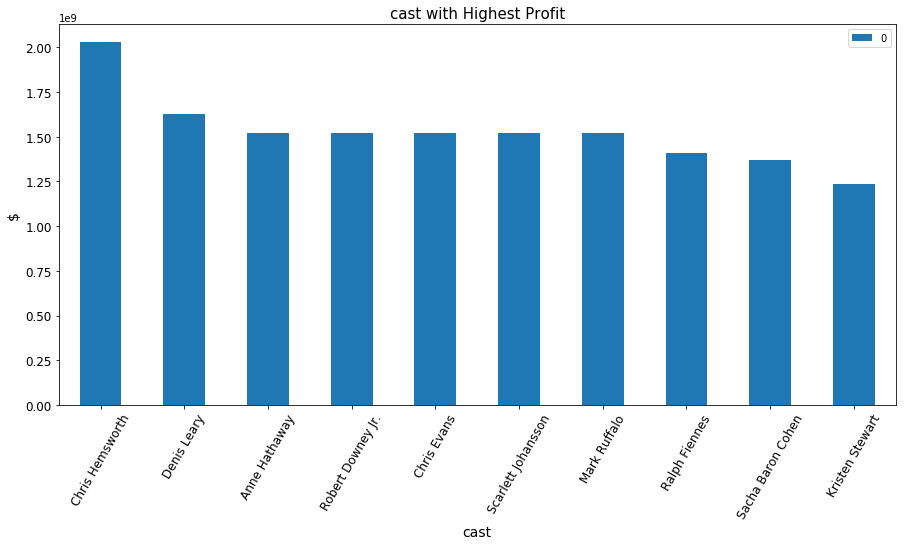

In [99]:
# решаем аналогично только фильтруем датасет по году
sum_gen=counter(data[data['release_year']==2012],'cast')
for gen in sum_gen.index:
    sum_gen[gen] = data['revenue'][data['release_year']==2012][data['cast'].map(lambda x: True if gen in x else False)].sum()
sum_gen = pd.DataFrame(sum_gen).sort_values(0, ascending=False)
sum_gen[:10].plot(kind='bar',figsize=(15,7),fontsize=12)
plt.xticks(rotation=60)
plt.title("cast with Highest Profit",fontsize=15)
plt.xlabel("cast",fontsize=14)
plt.ylabel("$",fontsize=14)
sum_gen[:10]

# 16. Какой актер снялся в большем количестве высокобюджетных фильмов? (в фильмах где бюджет выше среднего по данной выборке)
Варианты ответов:
1. Tom Cruise
2. Mark Wahlberg 
3. Matt Damon
4. Angelina Jolie
5. Brad Pitt

In [100]:
answers['16'] = '3. Matt Damon'

In [101]:
data['budget'].mean()

54310829.63843303

Matt Damon           18
Adam Sandler         17
Angelina Jolie       16
Tom Cruise           15
Samuel L. Jackson    15
Eddie Murphy         15
Ben Stiller          14
Hugh Jackman         14
Mark Wahlberg        14
Jamie Foxx           14
dtype: int64

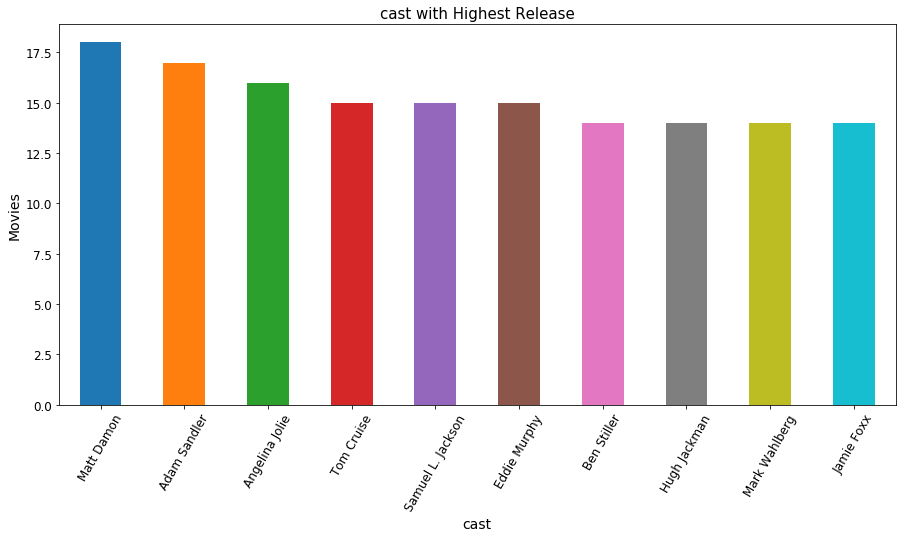

In [102]:
sum_gen=counter(data[data['budget'] > data['budget'].mean()],'cast')
sum_gen[:10].plot(kind='bar',figsize=(15,7),fontsize=12)
plt.xticks(rotation=60)
plt.title("cast with Highest Release",fontsize=15)
plt.xlabel("cast",fontsize=14)
plt.ylabel("Movies",fontsize=14)
sum_gen[:10]

ВАРИАНТ 2

In [103]:
pd.Series(data[data.budget > data.budget.mean()].cast.str.split('|').sum()).value_counts().index[0]

'Matt Damon'

# 17. В фильмах какого жанра больше всего снимался Nicolas Cage?  
Варианты ответа:
1. Drama
2. Action
3. Thriller
4. Adventure
5. Crime

In [ ]:
answers['17'] = '2. Action'

In [104]:
Counter(data[data.cast.str.contains('Nicolas Cage')].genres.str.split('|').sum()).most_common(1)

[('Action', 17)]

ВАРИАНТ 2

In [105]:
data_tmp = data[data.cast.str.contains("Nicolas Cage")]
# or
data_tmp = data[data['cast'].map(lambda x: True if 'Nicolas Cage' in x else False)]

Text(0, 0.5, 'Movies')

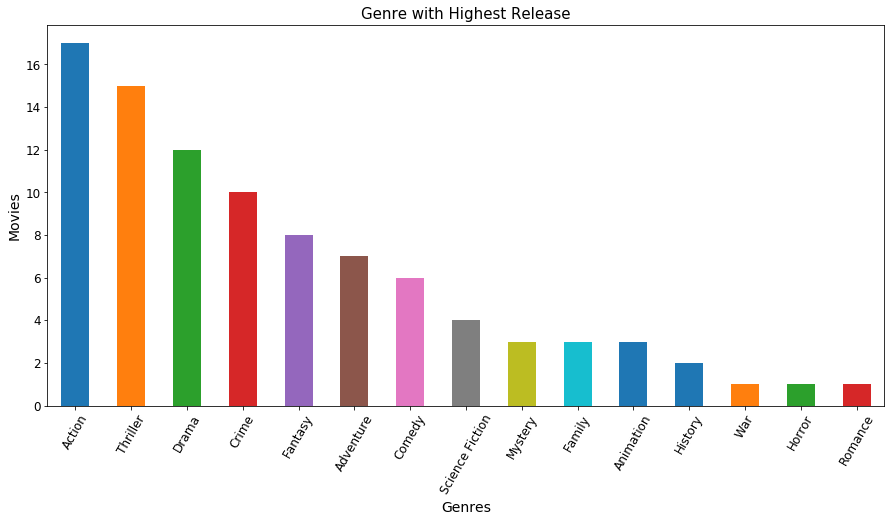

In [106]:
sum_gen=counter(data_tmp,'genres')
sum_gen.plot(kind='bar',figsize=(15,7),fontsize=12)
plt.xticks(rotation=60)
plt.title("Genre with Highest Release",fontsize=15)
plt.xlabel("Genres",fontsize=14)
plt.ylabel("Movies",fontsize=14)

# 18. Самый убыточный фильм от Paramount Pictures
Варианты ответа:

1. K-19: The Widowmaker tt0267626
2. Next tt0435705
3. Twisted tt0315297
4. The Love Guru tt0811138
5. The Fighter tt0964517

In [107]:
answers['18'] = '1. K-19: The Widowmaker (tt0267626)'

In [108]:
data[data['production_companies'].str.contains('Paramount Pictures', na=False)].sort_values(by='profit').head(1)['original_title'].values[0]

'K-19: The Widowmaker'

In [109]:
print_columns = ['profit', 'original_title', 'imdb_id', 'production_companies']
data[print_columns][data['production_companies'].map(lambda x: True if 'Paramount Pictures' in x else False)].sort_values('profit', ascending=False)[-10:]

,profit,original_title,imdb_id,production_companies
959,-14280643,Abandon,tt0267248,Paramount Pictures|Spyglass Entertainment|Touc...
436,-15809131,The Fighter,tt0964517,Paramount Pictures
1059,-17955723,A Thousand Words,tt0763831,Paramount Pictures|DreamWorks SKG|Saturn Films...
667,-20180936,The Love Guru,tt0811138,Paramount Pictures|Goldcrest Pictures|Internat...
587,-20750706,Domestic Disturbance,tt0249478,Paramount Pictures
1631,-24805000,Twisted,tt0315297,Paramount Pictures|Kopelson Entertainment|Harl...
1623,-46604061,Alfie,tt0375173,Paramount Pictures|Patalex Productions
1722,-51788987,Next,tt0435705,Paramount Pictures|Virtual Studios|Revolution ...
1123,-60519261,Timeline,tt0300556,Paramount Pictures|Donners' Company|Mutual Fil...
925,-64831034,K-19: The Widowmaker,tt0267626,Paramount Pictures|Intermedia Films|National G...


# 19. Какой год стал самым успешным по суммарным кассовым сборам?
Варианты ответа:
1. 2014
2. 2008
3. 2012
4. 2002
5. 2015

In [110]:
answers['19'] = '5. 2015'

release_year
2015    25449202382
2014    23405862953
2013    23213799791
2012    23079001687
2011    22676791872
2010    21071204961
2009    20261791024
2008    18252781990
2007    18162406801
2004    15663430720
Name: revenue, dtype: int64


(array([8.0e+09, 1.0e+10, 1.2e+10, 1.4e+10, 1.6e+10, 1.8e+10, 2.0e+10,
        2.2e+10, 2.4e+10, 2.6e+10, 2.8e+10]),
 <a list of 11 Text yticklabel objects>)

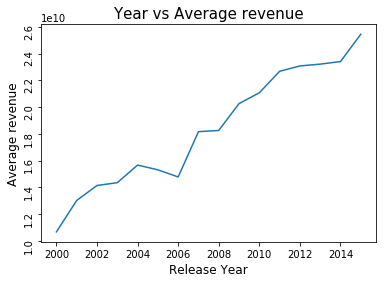

In [111]:
data.groupby('release_year')['revenue'].sum().plot()
print(data.groupby('release_year')['revenue'].sum().sort_values(0, ascending=False)[:10])
plt.title('Year vs Average revenue',fontsize=15)
plt.xlabel('Release Year',fontsize=12)
plt.ylabel('Average revenue',fontsize=12)
plt.yticks(rotation=90)

ВАРИАНТ 2

In [114]:
best_profit = pd.pivot_table(data, values='revenue', index='release_year', aggfunc='sum')
best_profit.revenue.sort_values(ascending=False).head(1)

release_year
2015    25449202382
Name: revenue, dtype: int64

# 20. Какой Самый прибыльный год для студии Warner Bros?
Варианты ответа:
1. 2014
2. 2003
3. 2012
4. 2010
5. 2015

In [ ]:
answers['20'] = '1. 2014'

In [115]:
data[data.production_companies.str.contains('Warner Bros')].groupby('release_year')['profit'].sum().idxmax()

2014

In [116]:
#Оставляем только записи фильмов, принадлежащих компании Warner Bros
warner_df = data[data['production_companies'].str.contains('Warner Bros')]

warner_df.groupby(['release_year'])['profit'].sum().sort_values(ascending = False)

release_year
2014    2295464519
2007    2201675217
2008    2134595031
2010    1974712985
2011    1871393682
2003    1855493377
2009    1822454136
2013    1636453400
2004    1631933725
2005    1551980298
2001    1343545668
2012    1258020056
2002    1022709901
2015     870368348
2006     620170743
2000     452631386
Name: profit, dtype: int64

(array([2.50e+08, 5.00e+08, 7.50e+08, 1.00e+09, 1.25e+09, 1.50e+09,
        1.75e+09, 2.00e+09, 2.25e+09, 2.50e+09]),
 <a list of 10 Text yticklabel objects>)

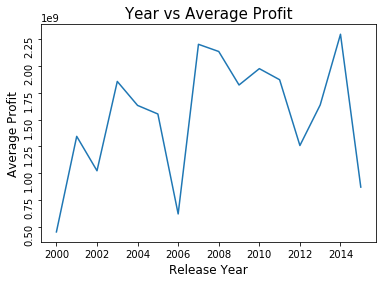

In [117]:
warner_df.groupby(['release_year'])['profit'].sum().plot()
plt.title('Year vs Average Profit',fontsize=15)
plt.xlabel('Release Year',fontsize=12)
plt.ylabel('Average Profit',fontsize=12)
plt.yticks(rotation=90)

# 21. В каком месяце за все годы суммарно вышло больше всего фильмов?
Варианты ответа:
1. Январь
2. Июнь
3. Декабрь
4. Сентябрь
5. Май

In [118]:
answers['21'] = '4. Сентябрь'

In [119]:
# не забываем сделать pd.to_datetime(data['release_date']) при предобработке
data.groupby(data['release_date'].dt.strftime('%B'))['imdb_id'].count().sort_values(ascending = False)

release_date
September    227
December     190
October      186
August       161
March        156
April        149
June         147
November     146
July         142
May          140
February     135
January      110
Name: imdb_id, dtype: int64

ВАРИАНТ 2

In [120]:
data.release_date.dt.month.value_counts()

9     227
12    190
10    186
8     161
3     156
4     149
6     147
11    146
7     142
5     140
2     135
1     110
Name: release_date, dtype: int64

# 22. Сколько суммарно вышло фильмов летом? (за июнь, июль, август)
Варианты ответа:
1. 345
2. 450
3. 478
4. 523
5. 381

In [121]:
answers['22'] = '2. 450'

In [122]:
print(len(data[(data.release_date.dt.month >=6) & (data.release_date.dt.month <=8)]))

450


In [123]:
len(data[data.release_date.dt.month.isin([6, 7, 8,])])

450

In [124]:
print(len(data[data['season'] == 3]))

450


# 23. Какой режисер выпускает (суммарно по годам) больше всего фильмов зимой?
Варианты ответов:
1. Steven Soderbergh
2. Christopher Nolan
3. Steven Spielberg
4. Ridley Scott
5. Peter Jackson

In [125]:
answers['23'] = '5. Peter Jackson'

In [126]:
data_tmp = data[data['season'] == 1]
# or
data_tmp = data[data.release_date.dt.month.isin([1, 2, 12,])]

Peter Jackson        7
Clint Eastwood       6
Steven Soderbergh    6
Adam Shankman        4
Martin Scorsese      4
Shawn Levy           4
Nancy Meyers         4
Donald Petrie        3
Patrick Lussier      3
Steve Carr           3
dtype: int64


Text(0, 0.5, 'Movies')

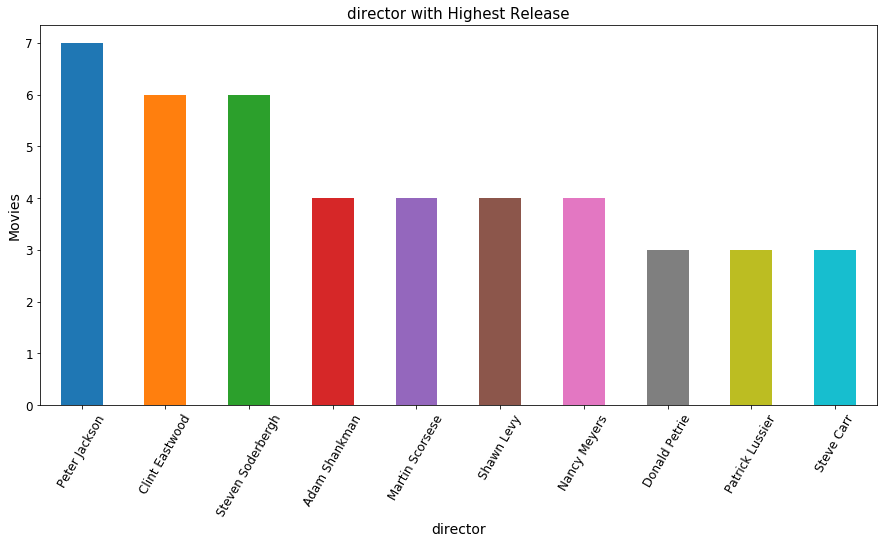

In [127]:
sum_gen=counter(data_tmp,'director')
print(sum_gen[:10])
sum_gen[:10].plot(kind='bar',figsize=(15,7),fontsize=12)
plt.xticks(rotation=60)
plt.title("director with Highest Release",fontsize=15)
plt.xlabel("director",fontsize=14)
plt.ylabel("Movies",fontsize=14)

# 24. Какая студия дает самые длинные названия своим фильмам по количеству символов?
Варианты ответа:
1. Universal Pictures
2. Warner Bros
3. Miramax Films
4. Paramount Pictures
5. Four By Two Productions

In [129]:
answers['24'] = '5. Four By Two Productions'

In [130]:
data['title_length'] = data['original_title'].map(lambda x: len(x))

,0
Four By Two Productions,83
"Jim Henson Company, The",59
Dos Corazones,47
Museum Canada Productions,46
Polsky Films,46
The Saul Zaentz Company,43
Cool Music,41
Total Entertainment,41
Zohar International,41
TSBD Canada Productions,41


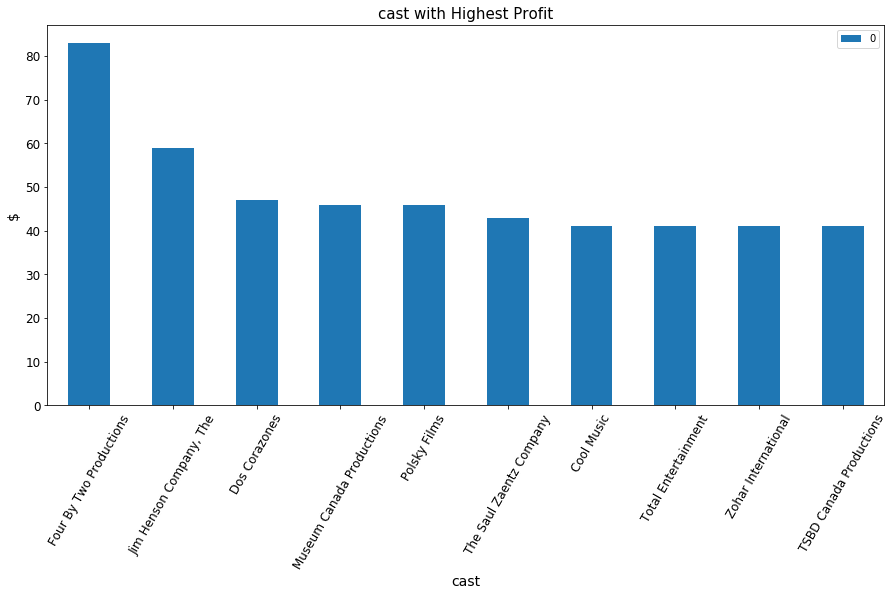

In [131]:
sum_gen=counter(data,'production_companies')
for gen in sum_gen.index:
    sum_gen[gen] = data['title_length'][data['production_companies'].map(lambda x: True if gen in x else False)].mean()
sum_gen = pd.DataFrame(sum_gen).sort_values(0, ascending=False)
sum_gen[:10].plot(kind='bar',figsize=(15,7),fontsize=12)
plt.xticks(rotation=60)
plt.title("cast with Highest Profit",fontsize=15)
plt.xlabel("cast",fontsize=14)
plt.ylabel("$",fontsize=14)
sum_gen[:10]

# 25. Описание фильмов какой студии в среднем самые длинные по количеству слов?

Варианты ответа:
1. Universal Pictures
2. Warner Bros
3. Midnight Picture Show
4. Paramount Pictures
5. Total Entertainment

In [132]:
answers['25'] = '3. Midnight Picture Show'

In [133]:
data['overview_words_length'] = data.overview.map(lambda x: len(x.split(' ')))

,0
Midnight Picture Show,175
Heineken Branded Entertainment,161
Room 9 Entertainment,161
98 MPH Productions,159
Brookwell-McNamara Entertainment,156


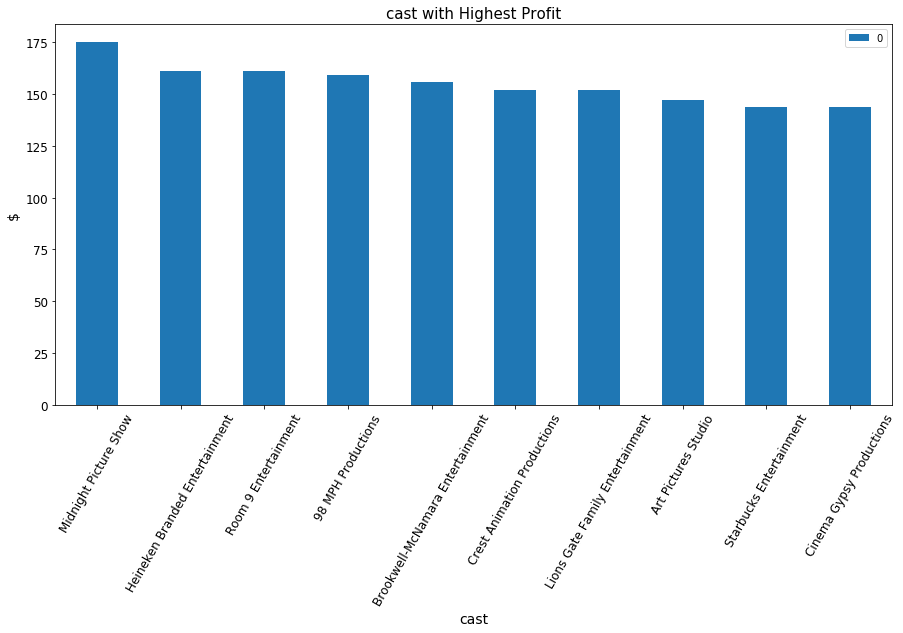

In [134]:
sum_gen=counter(data,'production_companies')
for gen in sum_gen.index:
    sum_gen[gen] = data['overview_words_length'][data['production_companies'].map(lambda x: True if gen in x else False)].mean()
sum_gen = pd.DataFrame(sum_gen).sort_values(0, ascending=False)
sum_gen[:10].plot(kind='bar',figsize=(15,7),fontsize=12)
plt.xticks(rotation=60)
plt.title("cast with Highest Profit",fontsize=15)
plt.xlabel("cast",fontsize=14)
plt.ylabel("$",fontsize=14)
sum_gen[:5]

# 26. Какие фильмы входят в 1 процент лучших по рейтингу? (vote_average)
Варианты ответа:
1. Inside Out, The Dark Knight, 12 Years a Slave
2. BloodRayne, The Adventures of Rocky & Bullwinkle
3. Batman Begins, The Lord of the Rings: The Return of the King, Upside Down
4. 300, Lucky Number Slevin, Kill Bill: Vol. 1
5. Upside Down, Inside Out, Iron Man

In [135]:
answers['26'] = '1. Inside Out, The Dark Knight, 12 Years a Slave'

In [136]:
data.loc[data['vote_average']>data.quantile(0.99, numeric_only=True)['vote_average']]['original_title']

9                                          Inside Out
34                                               Room
118                                      Interstellar
119                           Guardians of the Galaxy
125                                The Imitation Game
128                                         Gone Girl
138                          The Grand Budapest Hotel
370                                         Inception
599                                   The Dark Knight
872                                       The Pianist
1081    The Lord of the Rings: The Return of the King
1183                          The Wolf of Wall Street
1191                                 12 Years a Slave
1800                                          Memento
Name: original_title, dtype: object

ВАРИАНТ 2

In [137]:
border = np.quantile(data.vote_average, 0.99)
data[data.vote_average >= border].sort_values(by='vote_average', ascending=False)['original_title']

599                                       The Dark Knight
9                                              Inside Out
34                                                   Room
118                                          Interstellar
125                                    The Imitation Game
370                                             Inception
1191                                     12 Years a Slave
1183                              The Wolf of Wall Street
1081        The Lord of the Rings: The Return of the King
872                                           The Pianist
1800                                              Memento
119                               Guardians of the Galaxy
138                              The Grand Budapest Hotel
128                                             Gone Girl
283                                            Mr. Nobody
1688                                  There Will Be Blood
1563                Eternal Sunshine of the Spotless Mind
1444          

# 27. Какие актеры чаще всего снимаются в одном фильме вместе
Варианты ответа:
1. Johnny Depp & Helena Bonham Carter
2. Ben Stiller & Owen Wilson
3. Vin Diesel & Paul Walker
4. Adam Sandler & Kevin James
5. Daniel Radcliffe & Rupert Grint

In [1]:
# answers['27'] = '5. Daniel Radcliffe & Rupert Grint'
import pandas as pd
data=pd.read_csv('movie_bd_v5.xls')

In [42]:
from itertools import combinations
pairs = data.cast.apply(lambda x: list(tuple(sorted(comb)) for comb in combinations(x.split('|'), 2) )).tolist()
flattened = pd.DataFrame(pairs).stack()
flattened.value_counts()


(Emma Watson, Rupert Grint)            8
(Daniel Radcliffe, Emma Watson)        8
(Daniel Radcliffe, Rupert Grint)       8
(Helena Bonham Carter, Johnny Depp)    6
(Ben Stiller, Owen Wilson)             6
                                      ..
(Christina Applegate, Teddy Geiger)    1
(Paul Anderson, Will Poulter)          1
(Ewan McGregor, Sarah Bolger)          1
(Kate Hudson, Kathryn Hahn)            1
(Christopher Knights, Tom McGrath)     1
Length: 17943, dtype: int64

ВАРИАНТ 2

In [10]:
from collections import Counter
from itertools import combinations
pairs = Counter()
for i in range(0,len(data)):
    artists = data.cast[i].split('|')
    for j in list(combinations(artists, 2)):
        if j not in pairs:
            pairs[j] = 1
        else:
            pairs[j] += 1
pairs.most_common(5)

[(('Daniel Radcliffe', 'Rupert Grint'), 8),
 (('Daniel Radcliffe', 'Emma Watson'), 8),
 (('Rupert Grint', 'Emma Watson'), 7),
 (('Ben Stiller', 'Owen Wilson'), 6),
 (('Johnny Depp', 'Helena Bonham Carter'), 6)]

ВАРИАНТ 3

In [13]:
pairs = data.cast.apply(lambda x: combinations(x.split('|'), 2)).tolist()
flattened = pd.DataFrame(pairs).stack()
flattened.value_counts().head(5)

(Daniel Radcliffe, Emma Watson)        8
(Daniel Radcliffe, Rupert Grint)       8
(Rupert Grint, Emma Watson)            7
(Ben Stiller, Owen Wilson)             6
(Johnny Depp, Helena Bonham Carter)    6
dtype: int64

In [2]:
from collections import Counter
from itertools import combinations
pairs = Counter()
for i in range(0,len(data)):
    artists = data.cast[i].split('|')
    for j in list(combinations(artists, 2)):
        if (j not in pairs):
            if (j[-1], j[0]) not in pairs:
                pairs[j] = 1
            else:
                pairs[(j[-1], j[0])] += 1
        else:
            pairs[j] += 1

pairs.most_common(5)

[(('Daniel Radcliffe', 'Rupert Grint'), 8),
 (('Daniel Radcliffe', 'Emma Watson'), 8),
 (('Rupert Grint', 'Emma Watson'), 8),
 (('Ben Stiller', 'Owen Wilson'), 6),
 (('Johnny Depp', 'Helena Bonham Carter'), 6)]

# Submission

In [ ]:
answers

In [ ]:
len(answers)

# Доп материалы
%%time and %%timeit

https://jakevdp.github.io/PythonDataScienceHandbook/01.07-timing-and-profiling.html

iterrows или itertuples,когда используем циклы https://stackoverflow.com/questions/16476924/how-to-iterate-over-rows-in-a-dataframe-in-pandas

Интересный разбор эффективности функций: https://stackoverflow.com/questions/54028199/are-for-loops-in-pandas-really-bad-when-should-i-care

Копирование не равно https://stackoverflow.com/questions/35665135/why-can-pandas-dataframes-change-each-other

In [1]:
import pandas as pd
data = pd.read_csv('movie_bd_v5.xls')

In [4]:

dd = data[data['budget'] > data['budget'].mean()]

s = dd['cast'].str.split('|').apply(pd.Series, 1).stack()
s.index = s.index.droplevel(-1)
s.name = 'actors'
dd = dd.join(s)
dd.groupby('actors').count().sort_values(by='imdb_id', ascending=False).head(5)

,imdb_id,budget,revenue,original_title,cast,director,tagline,overview,runtime,genres,production_companies,release_date,vote_average,release_year
actors,,,,,,,,,,,,,,
Matt Damon,18,18,18,18,18,18,18,18,18,18,18,18,18,18
Adam Sandler,17,17,17,17,17,17,17,17,17,17,17,17,17,17
Angelina Jolie,16,16,16,16,16,16,16,16,16,16,16,16,16,16
Tom Cruise,15,15,15,15,15,15,15,15,15,15,15,15,15,15
Eddie Murphy,15,15,15,15,15,15,15,15,15,15,15,15,15,15


In [10]:
def make_pairs(list_for_pairs):
    '''Создает из списка список уникальных пар элементов'''
    pairs = []
    list_for_pairs = sorted(list_for_pairs)
    for index1 in range(0,len(list_for_pairs)):
        for index2 in range(index1+1, len(list_for_pairs)):
            pairs.append([list_for_pairs[index1], list_for_pairs[index2]])
    
    return(pairs)

def column_to_list(column):
    '''Создает новую копию DataFrame, переводит данные в колонке из строки в список'''
    df = data.copy(deep = True)
    df[column] = df[column].str.split('|')
    
    return df
data2 = column_to_list('cast')
data2['cast'] = data2['cast'].apply(make_pairs)


In [12]:
data2.explode('cast').cast.value_counts().keys()[1]

['Daniel Radcliffe', 'Rupert Grint']

In [14]:
data2.explode('cast').cast.value_counts()

[Daniel Radcliffe, Emma Watson]        8
[Daniel Radcliffe, Rupert Grint]       8
[Emma Watson, Rupert Grint]            8
[Ben Stiller, Owen Wilson]             6
[Helena Bonham Carter, Johnny Depp]    6
                                      ..
[Jake Gyllenhaal, Russell Peters]      1
[Josh Holloway, Liam Hemsworth]        1
[Beth Grant, Dennis Quaid]             1
[Columbus Short, Darrin Henson]        1
[Jim Caviezel, Val Kilmer]             1
Name: cast, Length: 17943, dtype: int64

In [16]:
from itertools import combinations
def couple(row):
    row=row.split("|")
    couple=combinations(row,2)
    for name in couple:
        return name

actor_dic=dict(Counter(data.cast.apply(couple)))

a27=max(actor_dic,key=actor_dic.get)
a27

('Daniel Radcliffe', 'Rupert Grint')

In [25]:
a27=sorted(actor_dic,key=actor_dic.get)
a27[-1:-5:-1]

[('Daniel Radcliffe', 'Rupert Grint'),
 ('Kristen Stewart', 'Robert Pattinson'),
 ('Mike Myers', 'Eddie Murphy'),
 ('Jennifer Lawrence', 'Josh Hutcherson')]